### This code snippet scrapes reviews of the movie with IMDb ID tt0111161 from IMDb's website. It sends an HTTP request to the specified URL, extracts review data from the HTML content using BeautifulSoup, stores the reviews in a DataFrame, and then saves it to a CSV file named imdb_reviews.csv.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Set the target URL
url = 'https://www.imdb.com/title/tt15239678/reviews'

# Send an HTTP request
response = requests.get(url)

# Parse HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Find reviews
reviews = soup.find_all('div', class_='text show-more__control')

# Create an empty list to store reviews
review_list = []

# Iterate through each review and extract the text
for review in reviews:
    review_text = review.get_text()
    review_list.append(review_text)

# Save the reviews into a DataFrame
reviews_df = pd.DataFrame(review_list, columns=['Review'])

# Save the DataFrame to a CSV file
reviews_df.to_csv('imdb_reviews.csv', index=False)

print('IMDB reviews have been successfully scraped and saved to the imdb_reviews.csv file.')

IMDB reviews have been successfully scraped and saved to the imdb_reviews.csv file.


### This code scrapes IMDb reviews for a specified movie ID, performs sentiment analysis using TextBlob, and then saves the reviews along with their ratings and sentiment scores to a CSV file.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob

def get_imdb_reviews(movie_id):
    # Construct the URL for IMDb reviews of the specified movie
    url = f'https://www.imdb.com/title/{movie_id}/reviews'
    # Send an HTTP request to the URL
    response = requests.get(url)
    # Parse the HTML content of the response
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all containers holding individual reviews
    review_containers = soup.find_all('div', class_='lister-item mode-detail imdb-user-review collapsable')
    # Initialize an empty list to store review data
    review_data = []

    # Iterate through each review container
    for container in review_containers:
        # Extract the text of the review
        review_text = container.find('div', class_='text show-more__control').get_text()
        # Find the rating element within the container, if available
        rating_element = container.find('span', class_='rating-other-user-rating')
        # Extract the rating from the rating element, or set to 'N/A' if not available
        rating = rating_element.find('span').get_text() if rating_element else 'N/A'
        # Perform sentiment analysis on the review text
        sentiment = TextBlob(review_text).sentiment.polarity
        # Add the review data to the list
        review_data.append({'Review': review_text, 'Rating': rating, 'Sentiment': sentiment})

    # Convert the list of review data into a DataFrame
    return pd.DataFrame(review_data)

if __name__ == '__main__':
    movie_id = 'tt15239678'  # The Shawshank Redemption
    # Call the function to get IMDb reviews and sentiment analysis for the specified movie
    reviews_df = get_imdb_reviews(movie_id)
    # Save the DataFrame to a CSV file
    reviews_df.to_csv('imdb_reviews_sentiment.csv', index=False)
    # Print a success message
    print('IMDB reviews and sentiment analysis results have been successfully scraped and saved to the imdb_reviews_sentiment.csv file.')


IMDB reviews and sentiment analysis results have been successfully scraped and saved to the imdb_reviews_sentiment.csv file.


### This code snippet loads the IMDb reviews and sentiment analysis results from the CSV file into a DataFrame, then uses seaborn and matplotlib to plot a histogram showing the distribution of sentiment scores.

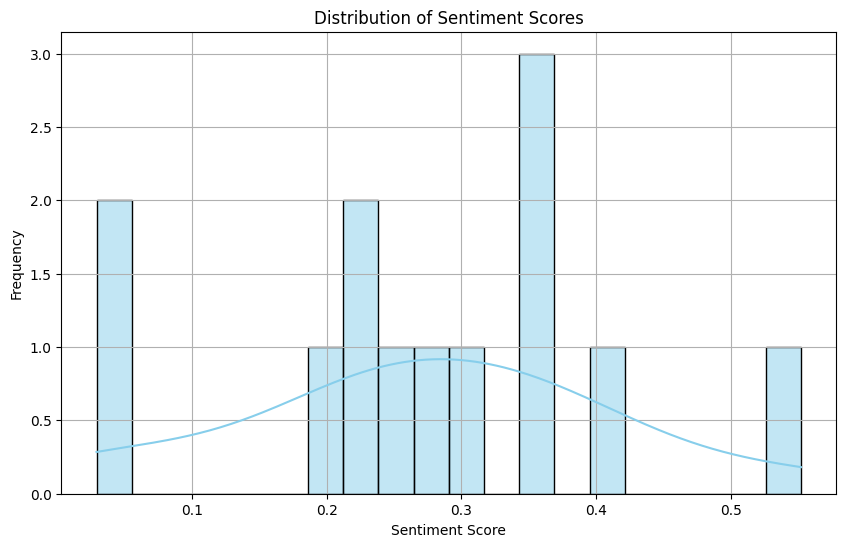

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file containing IMDb reviews and sentiment analysis results
reviews_df = pd.read_csv('imdb_reviews_sentiment.csv')

# Plot a histogram showing the distribution of sentiment scores
plt.figure(figsize=(10, 6))  # Set the figure size
# Use seaborn's histplot to create the histogram, specifying the data, number of bins, and enable kernel density estimation
sns.histplot(reviews_df['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')  # Set the title of the plot
plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Enable gridlines on the plot
plt.show()  # Display the plot